base lr: 1.00e-03
actual lr: 1.50e-03


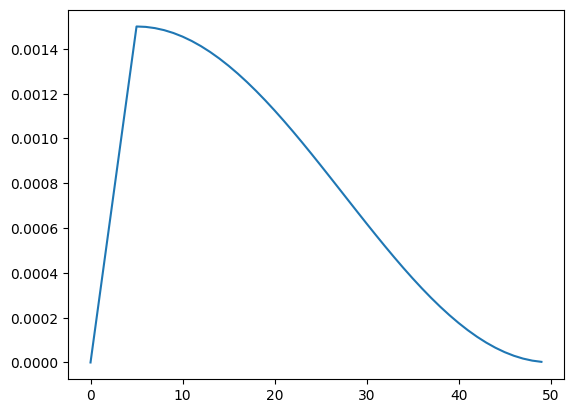

In [8]:
import math
import matplotlib.pyplot as plt

class Args:
    def __init__(self):
        self.blr = 1e-3
        self.min_lr = 1e-6
        self.warmup_epochs = 5
        self.epochs = 50
        self.batch_size = 64
        self.lr = None


def adjust_learning_rate(epoch, args):
    """Decay the learning rate with half-cycle cosine after warmup"""
    if epoch < args.warmup_epochs:
        lr = args.lr * epoch / args.warmup_epochs 
    else:
        lr = args.min_lr + (args.lr - args.min_lr) * 0.5 * \
            (1. + math.cos(math.pi * (epoch - args.warmup_epochs) / (args.epochs - args.warmup_epochs)))
    return lr

args = Args()
eff_batch_size = args.batch_size * 6
    
if args.lr is None:  # only base_lr is specified
    args.lr = args.blr * eff_batch_size / 256

print("base lr: %.2e" % (args.lr * 256 / eff_batch_size))
print("actual lr: %.2e" % args.lr)

rates = []
for epoch in range(0, args.epochs):
    rates.append(adjust_learning_rate(epoch, args))

plt.plot(rates)
